<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 4 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Decision trees

<h3> Plan </h3>

* **Принцип работы** 
 - Описание алгоритма (DT) принятия решений
 - Решающее правило в листах деревеьев
 - Применение DT к линейно разделимой выборке
 
* **Обучение деревьев решений**
 - Алгоритм обучения
 - Критерии информативности
 - Преимущества и недостатки (с точки зрения ML)

* **Применение DT на практике**
  - Визуализация деревьев (Graphviz)
  - Прунинг
  - Построение композиций над деревьями (пример)

In [1]:
import scipy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing as prp
from IPython.core.display import Image, display

%pylab inline
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


## Принцип работы

### Описание алгоритма принятия решений
** Example 1 ** 

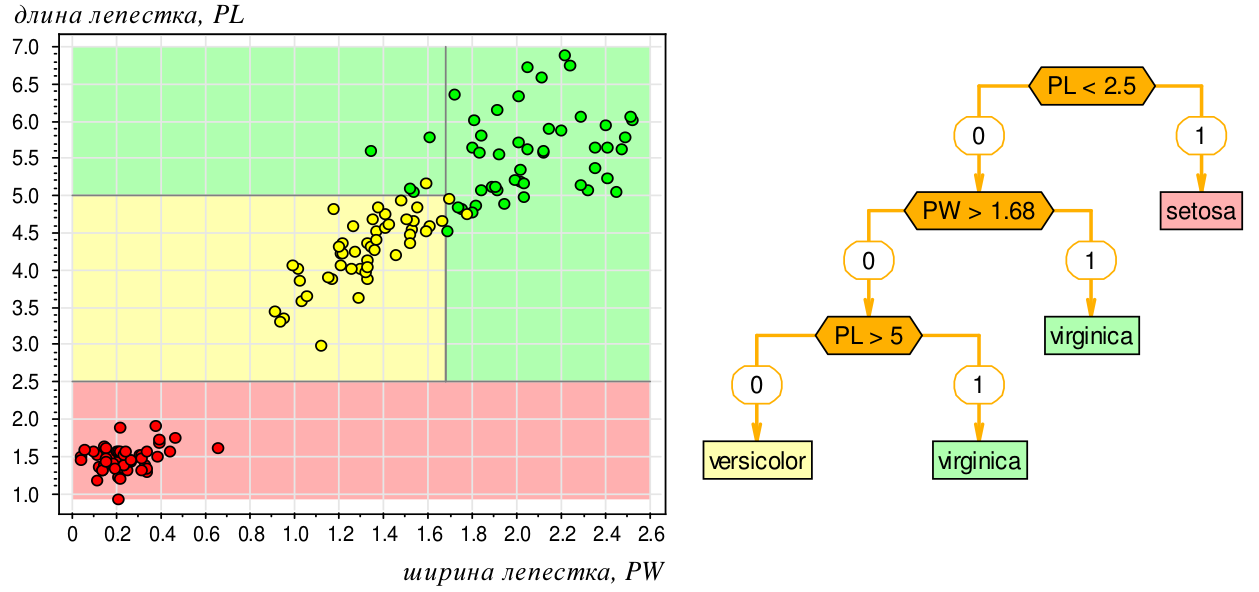

In [3]:
Image('pic/partition.png')

** Example 2 ** 

Adult dataset: https://archive.ics.uci.edu/ml/datasets/Adult

In [8]:
data = pd.read_csv('data/adult.csv', header=0, sep=', ', engine='python')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


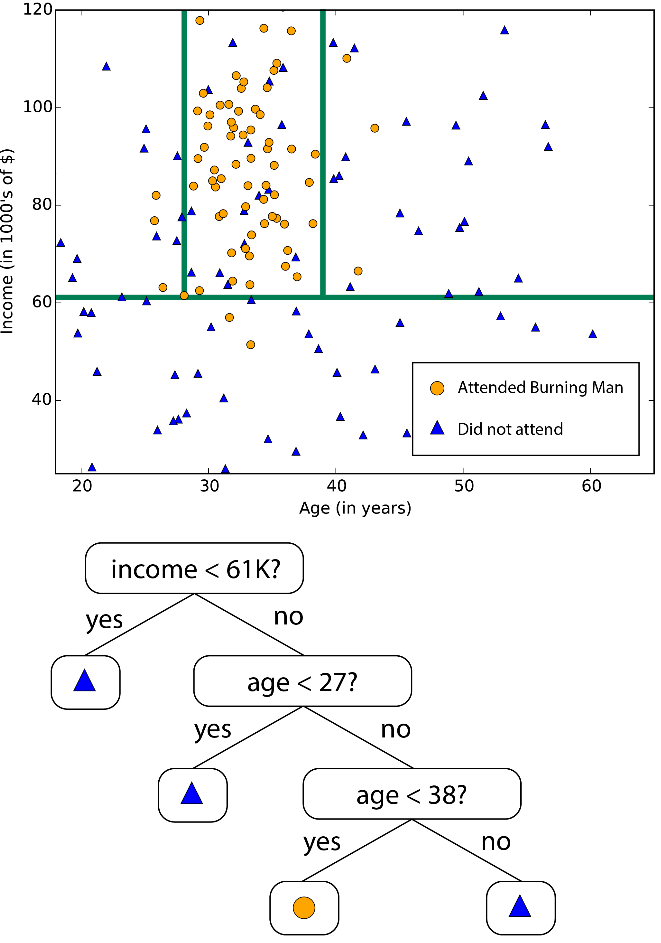

In [47]:
Image('pics/image5.png')

### Решающее правило в листах

<span style='color:red; font-size: 12pt'> Decision Tree (при неизменной обучающей выборке) - это кусочно постоянная функция </span> 

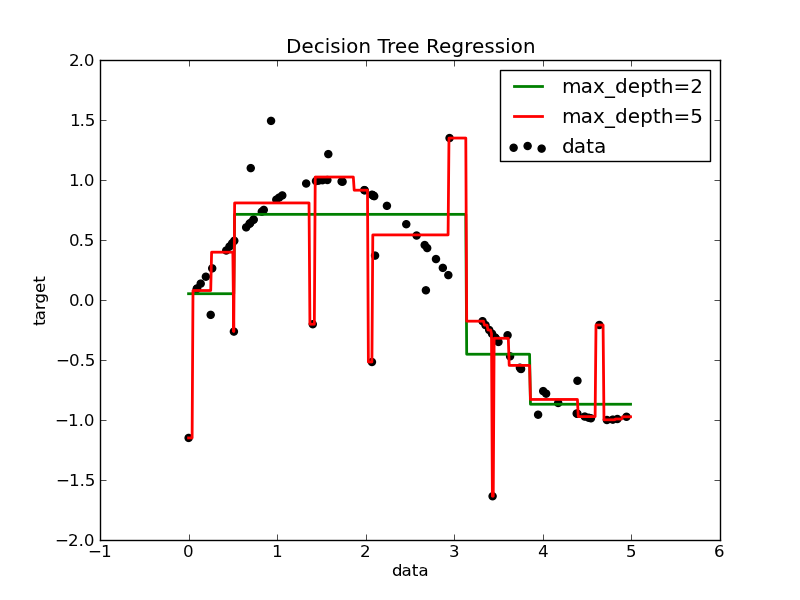

In [5]:
Image('pic/RegressionDT.png')

** Вопросы ** 
  
* 1) Как изменяется характер ответов DT, если количество элементов в листах дерева уменьшается (что то же самое: увеличивается глубина дерева)?
* 2) Насколько корректный ответ выдаёт DT, если новый объект выходят за "область определения" DT?
* 3) Изменяется ли ответ DT при небольшом изменении признакового описания объекта?

** Задача **

Какая стратегия поведения в листьях решающего дерева выгоднее: отвечать тот класс, который преобладает в листе, или отвечать 
случайно с тем же распределением классов, что и в листе?


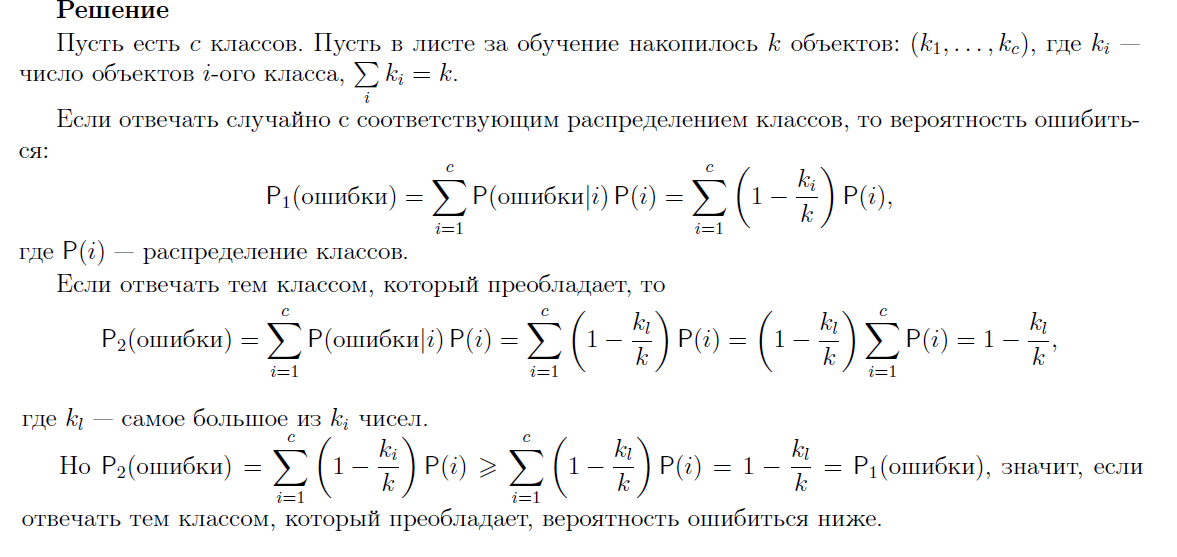

In [6]:
Image('pic/Task1_Solution.png')

### Преимущества и Недостатки алгоритма DT

** Преимущества**
 * хорошо интерпретируем
 * легко обобщаяется для регрессии и классификации
 
** Недостатки **
* Сравнение DT с линейными алгоритмами на линейно разделимой выборке: <a href="https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/04-trees/SklearnDecisionTreeExample.ipynb">SklearnDecisionTreeExample.ipynb <a>

-------

## Обучение  (построение) DT

### Общий принцип обучения DT

<span style="color:red; font-size:12pt"; font-size:12pt> Предикат - это бинарная функция на обучающей выборке </span>
###     $$ \beta(x) = 1~или~ p(x) = 0 $$  

При построении DT используются тривиальные предикаты вида $\{j, s\}$:
 ###     $$ \{j,~s\}(x) = \begin{cases}1,~ если~x^j \geq s \\ 0,~если~ x^j< s\end{cases} $$ 
 $x^j$ -  $j$-й признак объекта $x$

**Input**: 
$X^l$ - обучающая выборка

$\bigl\{\{j, s\}\bigr\}$ - множество предикатов

** Decision Tree ($X^l$, ) **  
 - 0) Инициализация: $X = X^l$
 - 1) Остановиться, если $X$ имеют одинаковые label
 - 2) Найти лучший предикат для разбиения $X$ на два подмножества:
#### $$P_1(j,s) = \{\mathbf{x}\in X|x_j\leq s\}~~~и~~~P_2(j,s) = \{\mathbf{x}\in X|x_j > s\}$$

(с точки зрения некоторого критерия $Q(X)$)
 - 3) Повторять шаги 1-3 для $X=P_1$ and $X=P_2.$

** Вопрос:** какие вы знаете критерии информативности?

### Критерии информативности

* Решаем $K$ - классовую задачу классификации, $1,...,K$ - индексы классов
* Обозначи $P_m$ - множество объектов в вершине $m$
* $N_m = |P_m|$ - количество объектов в вершине $m$
* $p_{mk} = \frac{1}{N_m}\sum_{x_i \in P_m}[y_i = k]$ - доля объектов класса $k$ в вершине $m$

#### Error criterion

 $F_E(P_m)$ - доля неверно размеченных, если вершину $m$ отнести к классу $k$

## $$F_E(P_m) = \frac{1}{N_m}\sum_{x_i \in P_m}[y_i \neq k]$$

Error criterion:
## $$  Q_E(P_m) = F_E(P_m) - \frac{N_\ell}{N_m} F_E(P_\ell) - \frac{N_r}{N_m} F_E(P_r),$$

where $\ell$ and $r$ are indexes of left and right nodes

** Внимание:** error criterion - неудачный пример критерия информативности!!!

---------
### Gini

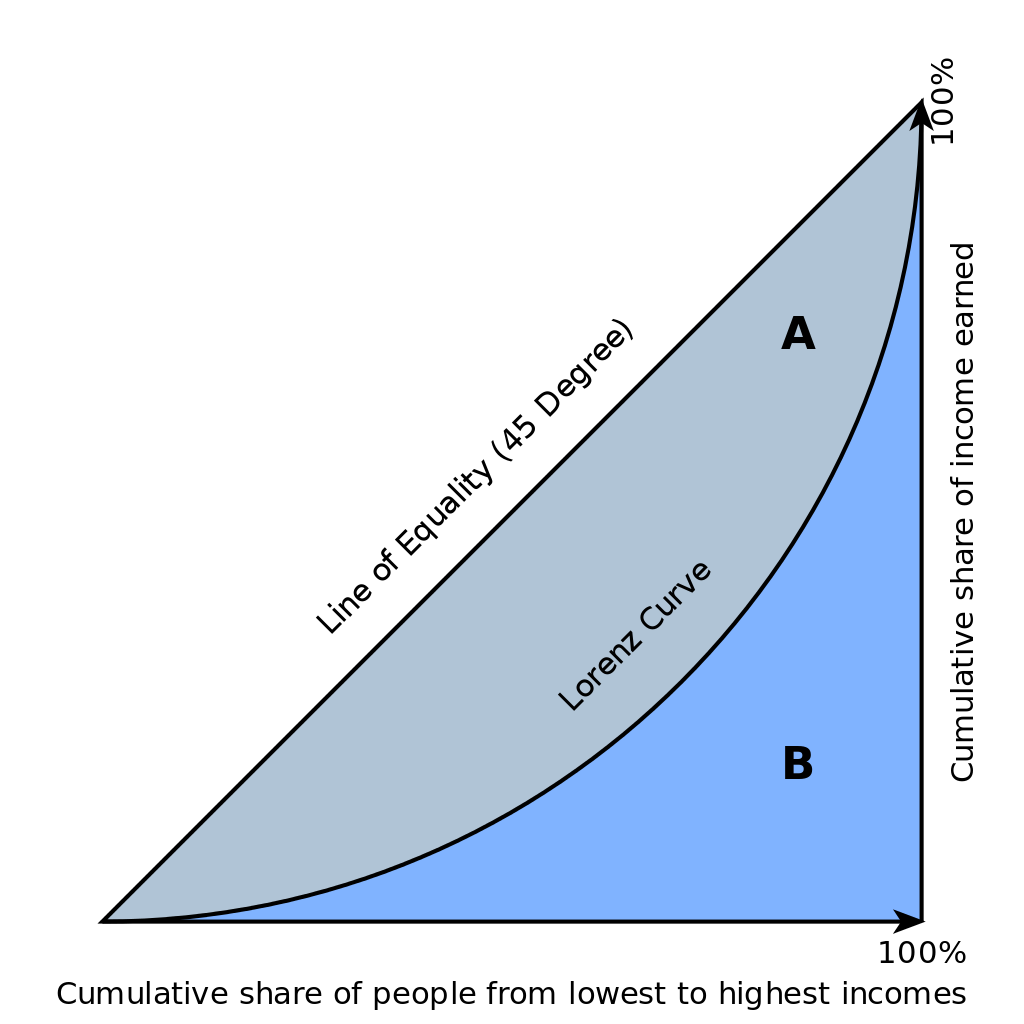

In [13]:
Image("pic/Economics_Gini_coefficient.png", width=400, height=400)

<a href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%94%D0%B6%D0%B8%D0%BD%D0%B8">Wikipedia </a> about index Gini

### $$ G=\frac {\sum_{i=1}^n \sum_{j=1}^n\left\vert y_i - y_j \right\vert }{ 2 n^2 \bar{y}} $$

Functional $F_G(P_m)$:
## $$    F_G(P_m)   =     \sum_{k \neq k'} p_{mk} p_{mk'} = \sum_{k = 1}^{K} p_{mk} \sum_{k' \neq k} p_{mk'} = \sum_{k = 1}^{K} p_{mk} (1 - p_{mk})$$

item Criterion based on Gini index (the same):
$$ Q_G(P_m) = F_G(P_m) - \frac{N_\ell}{N_m} F_G(P_\ell) - \frac{N_r}{N_m} F_G(P_r) $$

#### Class Work: Реализуем индекс Gini

In [14]:
sex = data.sex.value_counts(normalize=True)
print 'Sex counts: \n', sex

Sex counts: 
Male      0.669205
Female    0.330795
Name: sex, dtype: float64


In [15]:
sex = sex.to_dict()
sex

{'Female': 0.33079450876815825, 'Male': 0.66920549123184181}

In [22]:
# implement gini function
from pysal.inequality.gini import Gini

def gini(x):
    return ?????
try: 
    assert Gini(np.array(sex.values())).g - gini(np.array(sex.values())) < 0.000001
    print 'Gini function implementation is valid'
except: 
    print 'Gini function implementation is invalid'

Gini function implementation is valid


#### Entropy criterion

## $$ F_H(X)=-\sum_{k=1}^K p_{mk}\log_2 p_{mk} $$

In [16]:
from scipy.stats import entropy

In [24]:
# implement entropy function
entropy2 = lambda x: ?????

In [25]:
try: 
    assert entropy(sex.values(), base=2) - entropy2(sex.values()) < 0.001
    print 'Enropy function implementation is valid'
except: 
    print 'Enropy function implementation is invalid'

Enropy function implementation is valid


#### Get acquainted with Shennon Entropy
### $$entropy(p) = - \sum_i p_i~ln~p_i$$

In [58]:
np.log(1)

0.0

In [59]:
sc.stats.entropy([0.5, 0.5])

0.69314718055994529

In [60]:
sc.stats.entropy([0.1, 0.9])

0.3250829733914482

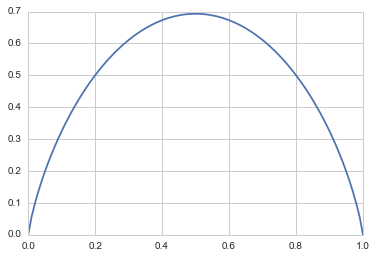

In [61]:
x = np.linspace(0, 1, 100)
y = map(lambda p: sc.stats.entropy([p, 1-p]), x)
pylab.plot(x, y)

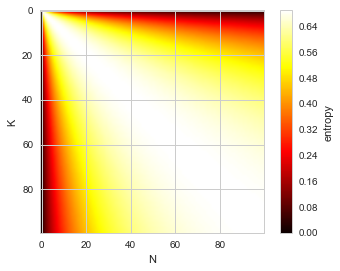

In [62]:
# Attention, bad code!!! 
im = np.zeros((100, 100))

for i in range(1, 100):
    for j in range(1, 100):
        p = [i , j]
        im[i, j] = sc.stats.entropy(p)
    
img = pylab.imshow(im, cmap='hot')
pylab.xlabel('N')
pylab.ylabel('K')
cb = pylab.colorbar(img)
cb.ax.set_ylabel('entropy')

#### MSE

- Если предсказываем цифру - нужно минизировать что-то для цифр
- Если фича непрерывная - отсечку выбираем сами

$$F_{MSE}(X) = \sum_i (y_i - c_{feature})^2$$

**Задача **

В вершине $m$ находится 800 объектов, всего 2 класса по 400 объектов каждого класса.

Имеется 2 предиката $\beta_1$ and $\beta_2:$

 *  $\beta_1$ splits $P_m$ in proportion (300,100) and (100,300)
 * $\beta_2$ splits $P_m$ in proportion (200,400) and (200,0)

Какой из предикатов будет выгоднее относительно критериев $Q_E(\cdot),$ $Q_G(\cdot),$ $Q_H(\cdot)$?

** Решение **

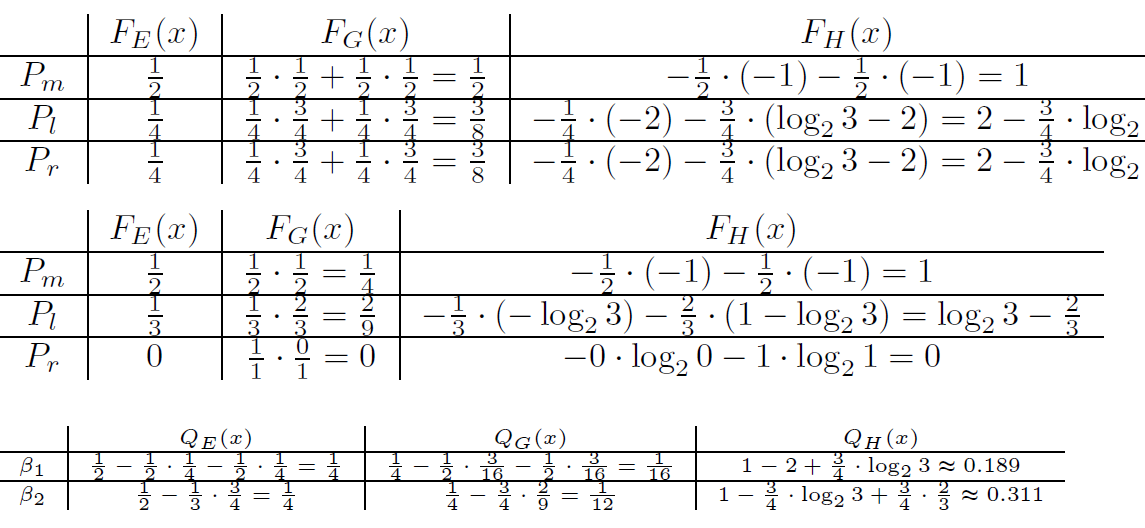

In [9]:
Image('pic/Task2_Solution.png')

### Преимущества и недостатки метода обучения

** Недостатки **
* Легко переобучается
   - часто в листьях небольшое кол-во объектов
   - большая глубина дерева
* Построенное дерево сильно зависит от обучающей выборки и набора признаков (<span style='color:red'> нестабильность </span>)
* требуется построение предикатов (<span style='color:red'>дискретизация признаков</span>)
* Нелинейная сложность от длины выборки $l$: 
## $$O\left(l\cdot d\cdot log_2(l)\right)$$

** Преимущества **
* Интепретируемость: чем выше фича, тем она более значимая (<span style='color:red'>важность признаков</span>)
* Можно распараллелить обучение для разных поддеревьев
* легко "докрутить", чтобы увеличить обобщающую способность (прунинг, ID3, CART)

---------
### Дискретизация признаков
https://github.com/UIUC-data-mining/mdlp-discretization

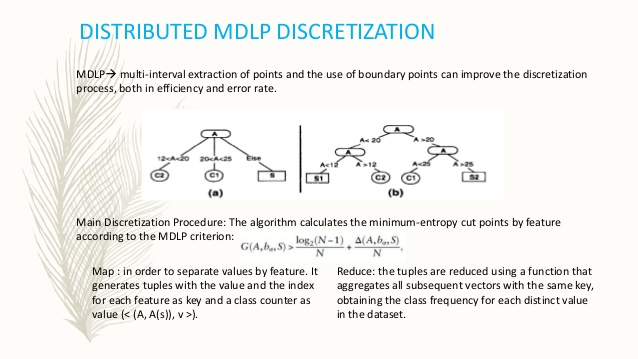

In [16]:
Image('pic/data-discretization.jpg', width=700, height=700)

### Нестабильность
- Жадная стратегия выбора блоков -> ошибаемся -> переподвешивание

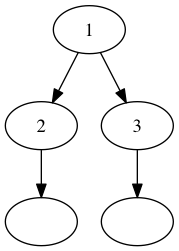

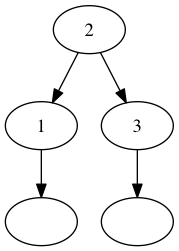

In [78]:
display(Image('pics/rew1.png'), Image('pics/rew2.png'))

Чем выше вершина в дереве, тем:
- нижее энтропия при разбиении по предикату из вершины
- вершина примет участие в решении для больших обектов
- ошибка в ней критична

Примеры на данных см <a href='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/04-trees/TreeVisualization.ipynb'>TreeVisualization.ipynb </a> в разделе <<Исследуем "устойчивость" модели>>

### Важность признаков 

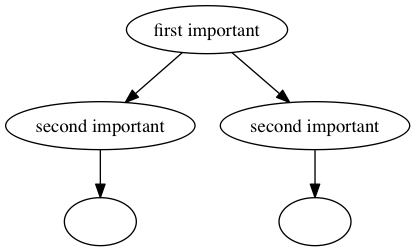

In [77]:
Image('pics/importance.png')

-------
## Применение DT на практике

### Tree Visualization (Graphviz)

см <a href="https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/04-trees/TreeVisualization.ipynb">TreeVisualization.ipynb</a>


### Prooning

- Уменьшение дерева (объединение поддеревьев)
- Ограничение высоты дерева, ограничение на минимальное количество элементов в листах 
** Вопрос:** какие еще подходы прунинга DT можно придумать?

### Composition of DT (example)

 See <a href="">SklearnDecisionTreeGB</a>

## Заключение
 
  * оцените <a href="https://docs.google.com/forms/d/e/1FAIpQLSdmyY3f-lwrhSGeqJPaxcXrdj0SfZzZbgRIggg-nx4EQ_eQLQ/viewform?c=0&w=1"> семинар </a>
  * оставьте <a href="https://docs.google.com/forms/d/e/1FAIpQLSdefy8neFtoxDlXD3toHi3fWB3OW-23APTRj-GuTX8wtAJahQ/viewform?c=0&w=1"> отзыв </a> о лекции 
  * HW #2 будет выложено здесь ml-mipt-part1/2017/home_work/